In [10]:
import pandas as pd
df_all = pd.read_csv('C:\\Users\\Brend\\Downloads\\metrics_top42.csv', index_col = 'name', encoding = "UTF-8")
print("Total: %d authors" % df_all.shape[0])

Total: 1931292 authors


In [11]:
df_trimmed = df_all[df_all['num_pubs'] >= 25]
df_trimmed = df_trimmed[df_trimmed['TotalConns'] >= 25]
print("Remaining after trimming: %d authors" % df_trimmed.shape[0])

Remaining after trimming: 482750 authors


In [16]:
for col in df_trimmed.columns:
    print("\nTop 10 %s" % str(col))
    df_not_null = df_trimmed[pd.notna(df_trimmed[col])]
    df_not_one = df_not_null[df_not_null[col] != 1]
    print(df_not_one[[col]].sort_values(col, ascending = False).head(10))


Top 10 num_pubs
                  num_pubs
name                      
Wei Wang           27712.0
Richard J. Lewis   26087.0
Wei Zhang          22749.0
Kristin Persson    21881.0
Wei Li             21163.0
Li Li              20087.0
Yan Li             17253.0
Lei Wang           17029.0
Lei Zhang          16570.0
Wei Liu            16255.0

Top 10 pct_collab_linauth
                   pct_collab_linauth
name                                 
Greta Beighton               0.961331
Silvia Helou                 0.853535
Jana Fančovičová             0.838281
Wolfgang J. Kox              0.828048
Craig Carthel                0.821645
Horst Kunkely                0.818672
Diane C. Wiernasz            0.818405
Andrew Yee                   0.817676
S. E. Wolkenberg             0.815714
Raivo Kalle                  0.807111

Top 10 pct_collab_linprof
                 pct_collab_linprof
name                               
Reinhard Voll              0.994545
Dieter Fritze              0.980906
Greta

In [15]:
for col in df_trimmed.columns:
    print("\nBottom 10 %s" % str(col))
    df_not_null = df_trimmed[pd.notna(df_trimmed[col])]
    df_not_zero = df_not_null[df_not_null[col] != 0]
    print(df_not_zero[[col]].sort_values(col, ascending = True).head(10))


Bottom 10 num_pubs
                            num_pubs
name                                
J. Sobel                        25.0
M. Christiane Brahimi-Horn      25.0
Kevin J. Gleason                25.0
Paula C. Fernandez              25.0
Roos F. Marsman                 25.0
Charlotte Bonneau               25.0
A. Y. Lee                       25.0
Siyuan Xia                      25.0
Maximilien Murone               25.0
Kevin J. Barry                  25.0

Bottom 10 pct_collab_linauth
                    pct_collab_linauth
name                                  
C. C. Levine                  0.000011
Syrkin Al                     0.000019
Ibrahim W. Habib              0.000020
V. M. Matveev                 0.000023
D. Adamczyk                   0.000024
Catalin Dumitrescu            0.000024
Satar Rezaei                  0.000025
Meunier Françoise             0.000026
Marina Weber                  0.000028
Rabin Banerjee                0.000031

Bottom 10 pct_collab_linprof
        

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)
%matplotlib inline

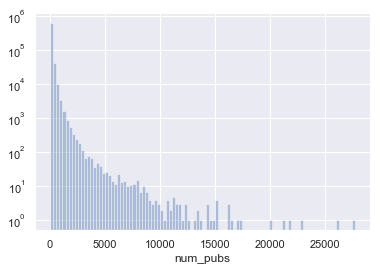

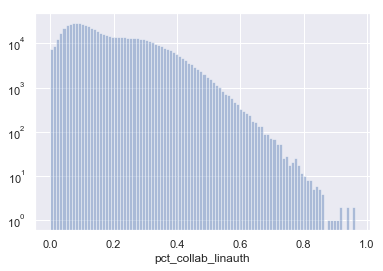

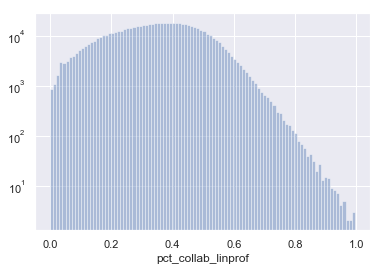

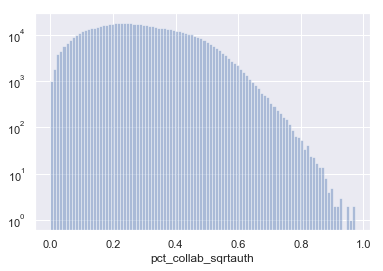

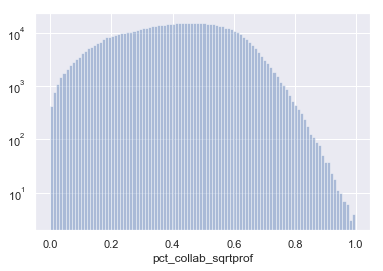

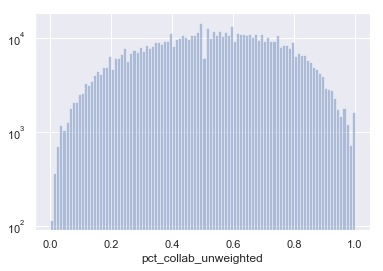

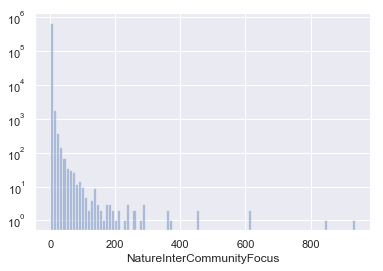

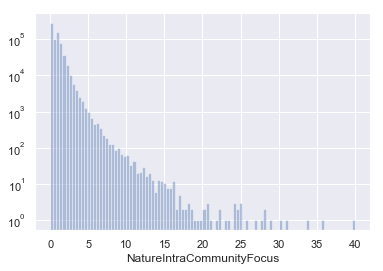

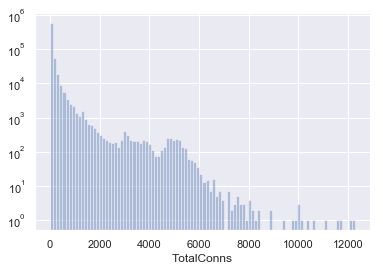

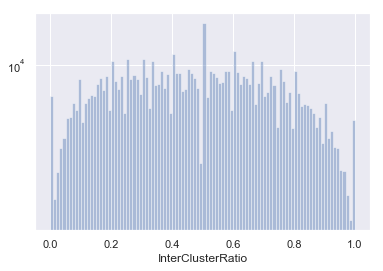

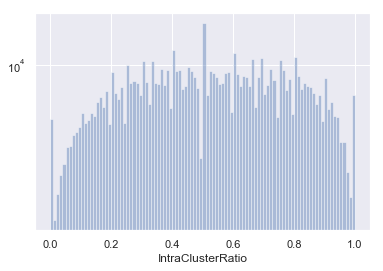

In [17]:
for col in df_trimmed.columns:
    df_not_null = df_trimmed[pd.notna(df_trimmed[col])]
    ax = sns.distplot(df_not_null[[col]], kde = False, axlabel = col, bins = 100)
    ax.set_yscale('log')
    plt.show()

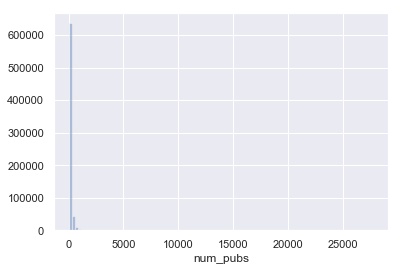

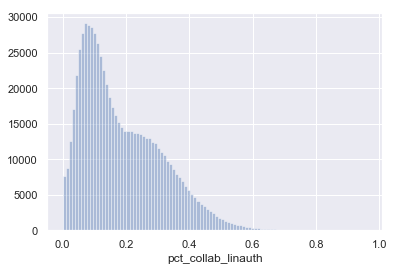

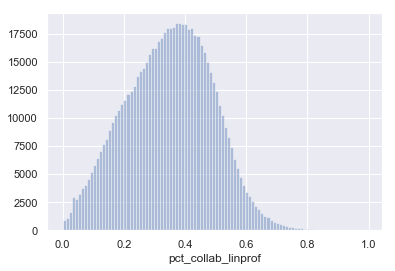

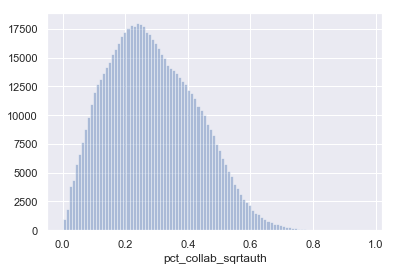

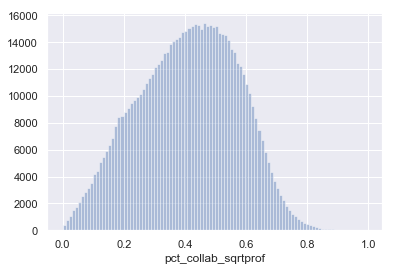

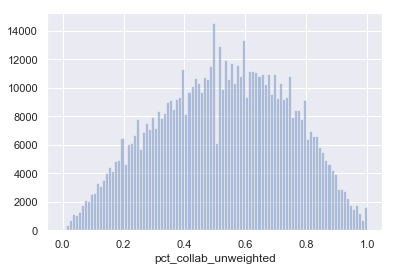

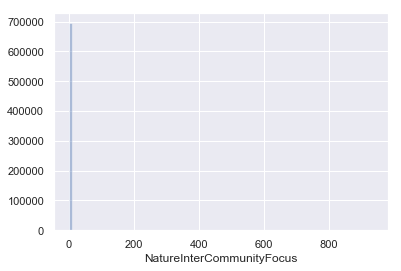

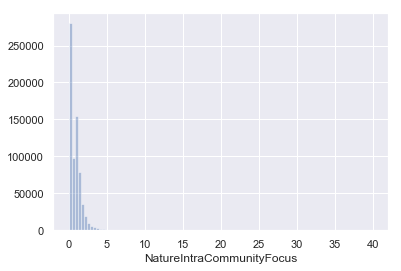

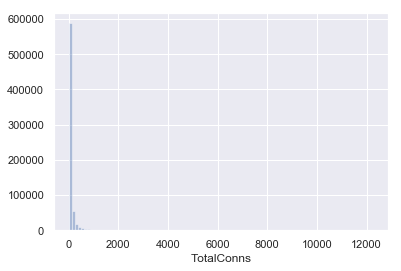

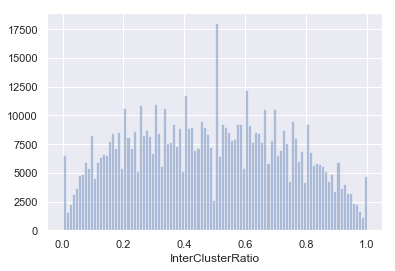

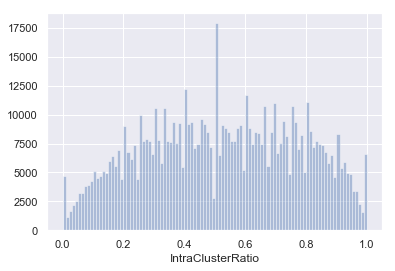

In [18]:
for col in df_trimmed.columns:
    df_not_null = df_trimmed[pd.notna(df_trimmed[col])]
    ax = sns.distplot(df_not_null[[col]], kde = False, axlabel = col, bins = 100)
    plt.show()